### Importing Libraris

In [65]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from mosaicml import *
from mosaicml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Analysis and Preparation

In [42]:
data = pd.read_csv("Steel_industry_data.csv")
data.head()
# data.isnull().sum()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [43]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


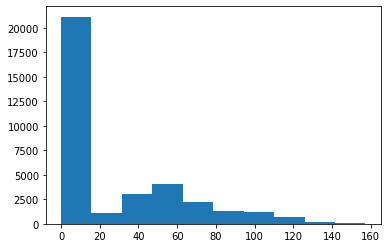

In [44]:
plt.hist(data["Usage_kWh"])
plt.show()

In [45]:
feature_columns = [column for column in data.columns if not column == "Usage_kWh" ]
input_data = data[feature_columns]
output_data = data["Usage_kWh"]

## Correcting DataSets

In [52]:
input_data.drop("date",axis="columns",inplace=True)

In [55]:
data = pd.get_dummies(input_data)

In [57]:
data

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2.95,0.00,0.0,73.21,100.00,900,1,0,0,1,0,0,0,0,0,1,0,0
1,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,1,0,0,0,0,0,1,0,0
2,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,1,0,0,0,0,0,1,0,0
3,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,1,0,0,0,0,0,1,0,0
4,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,1,0,0,0,0,0,1,0,0
35036,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,1,0,0,0,0,0,1,0,0
35037,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,1,0,0,0,0,0,1,0,0
35038,3.06,0.11,0.0,77.72,99.96,85500,1,0,0,1,0,0,0,0,0,1,0,0


In [59]:
x_train, x_test, y_train, y_test = train_test_split(data, output_data, test_size=0.25, random_state=1)

In [62]:
print(y_train)

11482     69.70
24304      2.56
31558      2.99
28686     51.37
28362     44.32
          ...  
7813     122.90
32511    105.91
5192       5.98
12172    106.09
33003      4.46
Name: Usage_kWh, Length: 26280, dtype: float64


### Model Preparation

In [67]:
reg = RandomForestRegressor(n_estimators=10,random_state=0)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [73]:
y_predict = reg.predict(x_test)
features = list(input_data)
print(features)

['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [71]:
@scoring_func
def score(model,request):
    payload = request.json["payload"]
    data_list =  payload
    data_array = np.asarray(data_list)
    try:
        prediction = model.predict(data_array)
        
    except:
        prediction = model.predict(data_array.reshape(1,-1))
    return prediction.tolist()

In [ ]:
register_model(
    reg,
    score,
    "Energy_Consumption",
    "Energy_Consumption_of_steel_plant",
    MLModelFlavours.sklearn,
    init_script = "mkdir abc \\n cd abc \\n touch abc.txt",
    input_type = "json",
    explain_ai = True,
    x_train = x_train,
    y_train = y_train,
    y_true = y_test,
    y_pred = y_predict,\
    prob = y_test,
    feature_names = features,
    feature_ids = features,
    target_names = ["Usage_kWh"],
    model_type = "regression"
)